# EDA: Restaurant's cuisine ratings data

## Description : The main objective of this project is to perform Exploratory Data Analysis on a restaurant's cuisine rating data.
Data Source: Kaggle dataset

## Importing necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importing dataset

In [ ]:
df=pd.read_csv("/Cuisine_rating.csv")
df.head()

,User ID,Area code,Location,Gender,YOB,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Often A S
0,1,153,"Upper East Side,NY",Female,2006,Single,Professional,3,Japanese,Never,Never,5,4,4.5,No
1,2,123,"St. George,NY",Female,1991,Married,Student,3,Indian,Never,Socially,1,1,1.0,No
2,3,122,"Upper West Side,NY",Male,1977,Single,Student,5,Seafood,Often,Often,5,5,5.0,Yes
3,4,153,"Upper East Side,NY",Female,1956,Married,Professional,5,Japanese,Never,Socially,3,1,2.0,No
4,5,129,"Central Park,NY",Male,1997,Single,Student,4,Filipino,Socially,Never,2,4,3.0,No


## Data Preprocessing

In [ ]:
df.shape

(200, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   User ID         200 non-null    int64  
 1   Area code       200 non-null    int64  
 2   Location        200 non-null    object 
 3   Gender          200 non-null    object 
 4   YOB             200 non-null    int64  
 5   Marital Status  200 non-null    object 
 6   Activity        200 non-null    object 
 7   Budget          200 non-null    int64  
 8   Cuisines        200 non-null    object 
 9   Alcohol         200 non-null    object 
 10  Smoker          200 non-null    object 
 11  Food Rating     200 non-null    int64  
 12  Service Rating  200 non-null    int64  
 13  Overall Rating  200 non-null    float64
 14  Often A S       200 non-null    object 
dtypes: float64(1), int64(6), object(8)
memory usage: 23.6+ KB


In [ ]:
df.isnull().sum()

User ID           0
Area code         0
Location          0
Gender            0
YOB               0
Marital Status    0
Activity          0
Budget            0
Cuisines          0
Alcohol           0
Smoker            0
Food Rating       0
Service Rating    0
Overall Rating    0
Often A S         0
dtype: int64

#### Conclusion: There are no missing values in this dataset

In [ ]:
df.describe()

,User ID,Area code,YOB,Budget,Food Rating,Service Rating,Overall Rating
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,141.060000,1984.830000,3.815000,3.220000,3.230000,3.225000
std,57.879185,26.130257,16.809339,1.056578,1.411226,1.526022,1.079445
min,1.000000,101.000000,1955.000000,1.000000,1.000000,1.000000,1.000000
25%,50.750000,123.000000,1971.000000,3.000000,2.000000,2.000000,2.500000
50%,100.500000,135.000000,1987.000000,4.000000,3.000000,3.000000,3.000000
75%,150.250000,158.000000,2000.000000,5.000000,5.000000,5.000000,4.000000
max,200.000000,199.000000,2009.000000,5.000000,5.000000,5.000000,5.000000


In [ ]:
num=df.select_dtypes(exclude=object)

In [ ]:
def Find_Outliers(df):
  for i in num:
         q1=df[i].quantile(0.25)
         q3=df[i].quantile(0.75)
         IQR=q3-q1
         l1=q1 - (IQR * 1.5)
         l2=q3 + (IQR * 1.5)
         l3=df[i]<=l1
         l4=df[i]>=l2
         outliers = df[((df[i]<(l1)) | (df[i]>(l2)))]
         return outliers

outliers = Find_Outliers(df)
print('number of outliers: '+ str(len(outliers)))
print('max outlier value: '+ str(outliers.max()))
print('min outlier value: '+ str(outliers.min()))

number of outliers: 0
max outlier value: User ID           NaN
Area code         NaN
Location          NaN
Gender            NaN
YOB               NaN
Marital Status    NaN
Activity          NaN
Budget            NaN
Cuisines          NaN
Alcohol           NaN
Smoker            NaN
Food Rating       NaN
Service Rating    NaN
Overall Rating    NaN
Often A S         NaN
dtype: object
min outlier value: User ID           NaN
Area code         NaN
Location          NaN
Gender            NaN
YOB               NaN
Marital Status    NaN
Activity          NaN
Budget            NaN
Cuisines          NaN
Alcohol           NaN
Smoker            NaN
Food Rating       NaN
Service Rating    NaN
Overall Rating    NaN
Often A S         NaN
dtype: object


### Conclusion: It indicates that there are no outliers in dataset.

## Data Manipulation

In [ ]:
df.head()

,User ID,Area code,Location,Gender,YOB,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Often A S
0,1,153,"Upper East Side,NY",Female,2006,Single,Professional,3,Japanese,Never,Never,5,4,4.5,No
1,2,123,"St. George,NY",Female,1991,Married,Student,3,Indian,Never,Socially,1,1,1.0,No
2,3,122,"Upper West Side,NY",Male,1977,Single,Student,5,Seafood,Often,Often,5,5,5.0,Yes
3,4,153,"Upper East Side,NY",Female,1956,Married,Professional,5,Japanese,Never,Socially,3,1,2.0,No
4,5,129,"Central Park,NY",Male,1997,Single,Student,4,Filipino,Socially,Never,2,4,3.0,No


In [ ]:
## Getting information on cuisines and food ratings.
cuisines_food_rating=df.groupby(["Cuisines"])["Food Rating"].sum()
cuisines_food_rating



Cuisines
Chinese      83
Filipino     92
French      112
Indian       89
Italian      58
Japanese    139
Seafood      71
Name: Food Rating, dtype: int64

In [ ]:
## Getting information on gender, marital status and activity
gender_maritalstatus_activity= df.groupby(['Gender','Marital Status'])['Activity'].count()
gender_maritalstatus_activity

Gender  Marital Status
Female  Divorced           6
        Married           36
        Single            40
Male    Divorced           8
        Married           50
        Single            60
Name: Activity, dtype: int64

In [ ]:
## Getting information on cuisines and budget
cuisines_budget=df.groupby(['Cuisines'])['Budget'].sum()
cuisines_budget

Cuisines
Chinese      98
Filipino    126
French      134
Indian      109
Italian      70
Japanese    148
Seafood      78
Name: Budget, dtype: int64

In [18]:
activity_cuisines= df.groupby(['Activity','Cuisines'])['User ID'].count()
activity_cuisines

Activity      Cuisines
Professional  Chinese      8
              Filipino    14
              French      16
              Indian      18
              Italian      6
              Japanese    12
              Seafood      6
Student       Chinese     16
              Filipino    20
              French      18
              Indian      14
              Italian     12
              Japanese    24
              Seafood     16
Name: User ID, dtype: int64

In [24]:
drink_ratio=df.groupby(["Alcohol ","Gender"])["User ID"].count()
drink_ratio

Alcohol   Gender
Never     Female    40
          Male      48
Often     Female    25
          Male      36
Socially  Female    17
          Male      34
Name: User ID, dtype: int64

In [25]:
smoker_ratio=df.groupby(["Smoker","Gender"])["User ID"].count()
smoker_ratio

Smoker    Gender
Never     Female    20
          Male      39
Often     Female    28
          Male      42
Socially  Female    34
          Male      37
Name: User ID, dtype: int64

## Data Visualization

<ipython-input-33-6439c2161d57>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  sns.barplot(y=df[y_axis],x=df[x_axis],ci=0,saturation=5.5)


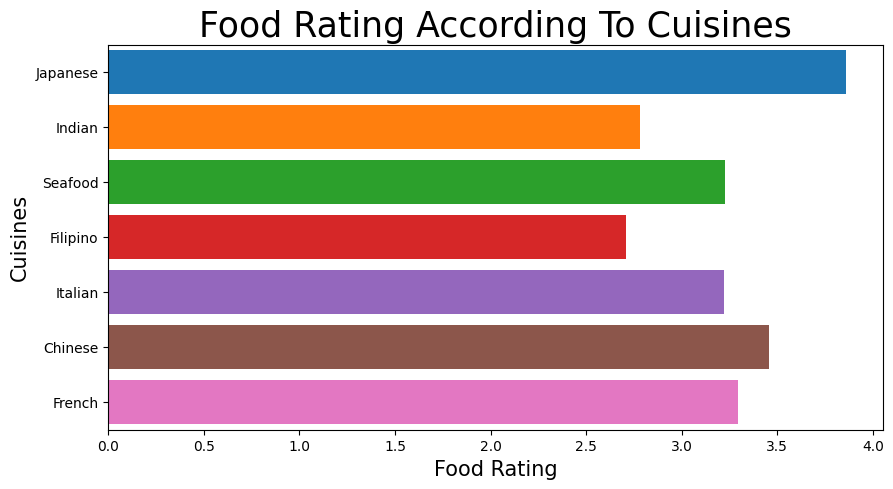

In [33]:
def plot_bar(df,x_axis,y_axis):
  sns.barplot(y=df[y_axis],x=df[x_axis],ci=0,saturation=5.5)
  plt.xticks(fontsize=10)
  plt.yticks(fontsize=10)
  plt.xlabel(x_axis,fontsize=15)
  plt.ylabel(y_axis,fontsize=15)
  plt.title("Food Rating According To Cuisines",fontsize = 25)
fig = plt.figure(figsize=(10,5))
plot_bar(df,'Food Rating','Cuisines')

### Conclusion: The above graph shows that the Japnese cuisine has the highest rating and Filipino cuisine has the lowest rating.

Text(0.5, 1.0, 'Consumption of Alcohol according to Gender')

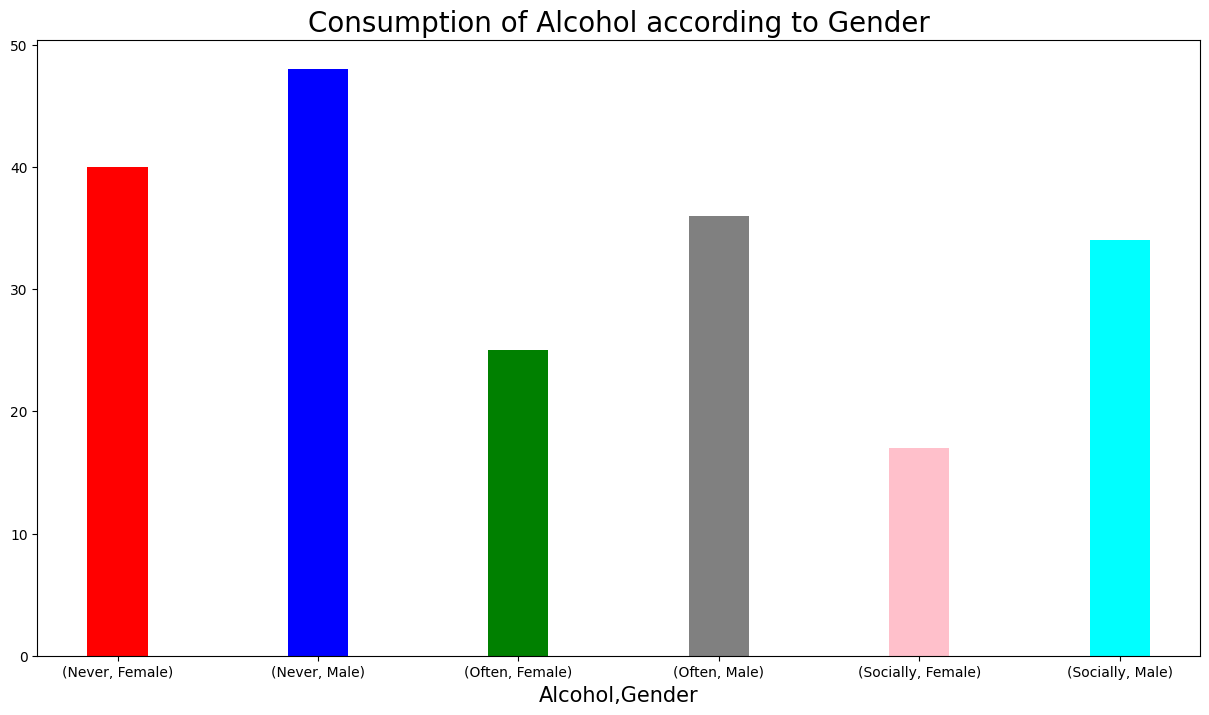

In [46]:
drink_ratio.plot(kind='bar',rot=0, figsize= (15,8),width=0.3, color=['red','blue','green','grey','pink','cyan'])
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Alcohol,Gender',fontsize=15)
plt.title("Consumption of Alcohol according to Gender",fontsize = 20)

Text(0.5, 1.0, 'Smoking rate according to Gender ')

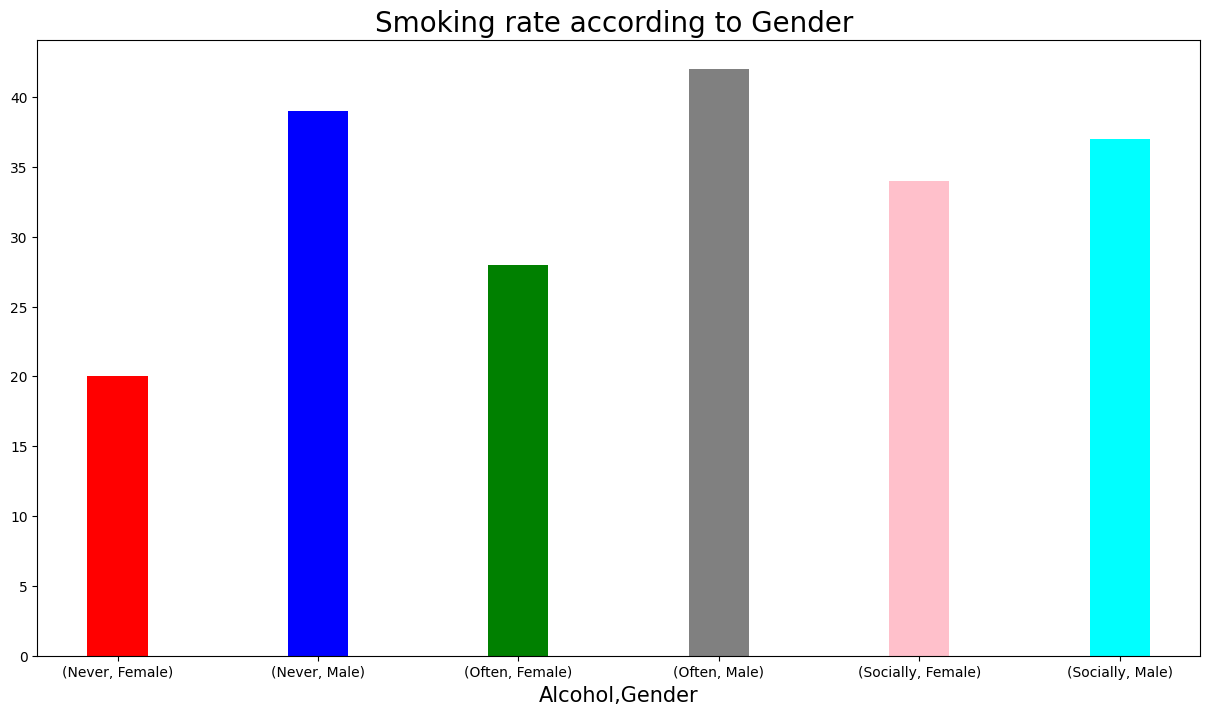

In [47]:
smoker_ratio.plot(kind='bar',rot=0, figsize= (15,8),width=0.3, color=['red','blue','green','grey','pink','cyan'])
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Alcohol,Gender',fontsize=15)
plt.title("Smoking rate according to Gender ",fontsize = 20)

### Conclusion: From the above graph, their is maximum number of males who often smoke and maximum number of females smoke socially. And their are least number of females who never smoke.

Text(0.5, 1.0, 'Budgets According To Cuisines')

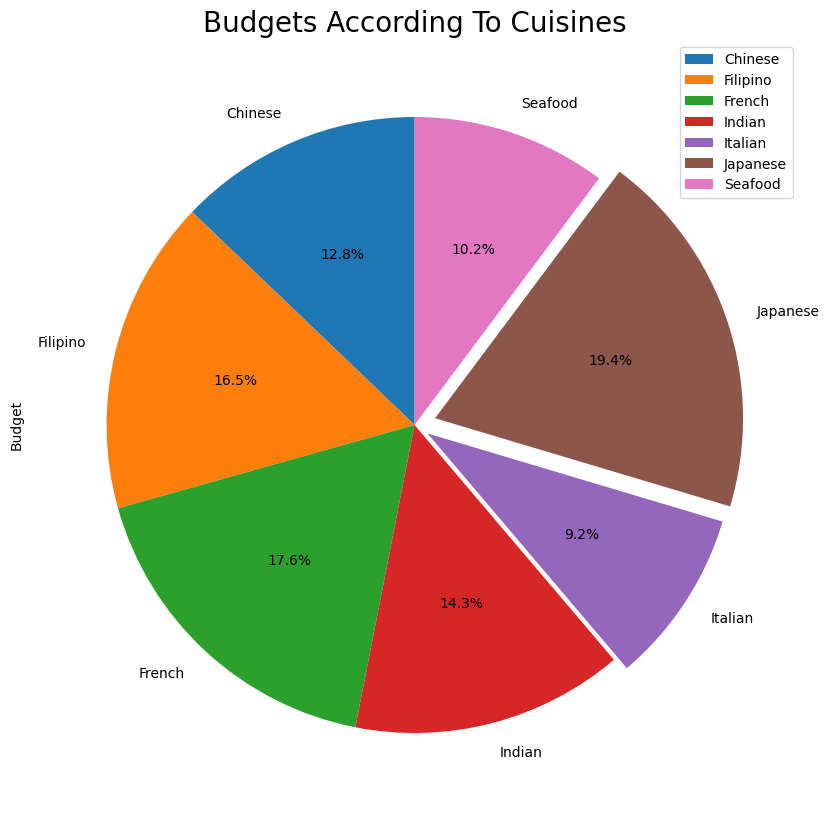

In [52]:
cuisines_budget.plot(kind='pie',rot=90,explode=(0.0,0.0,0.0,0.0,0.05,0.07,0.0),startangle = 90,autopct='%1.1f%%', textprops={'fontsize': 10}, figsize=(10,10))
plt.legend()
plt.title("Budgets According To Cuisines",fontsize = 20)

### Conclusion: The above piechart shows that Japnese cuisine is most expensive and Italian is least.

<ipython-input-38-149173e9cd31>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()
<ipython-input-38-149173e9cd31>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap="YlGnBu", annot=True,  annot_kws={'size': 15})


Text(0.5, 1.0, 'Correlation plot')

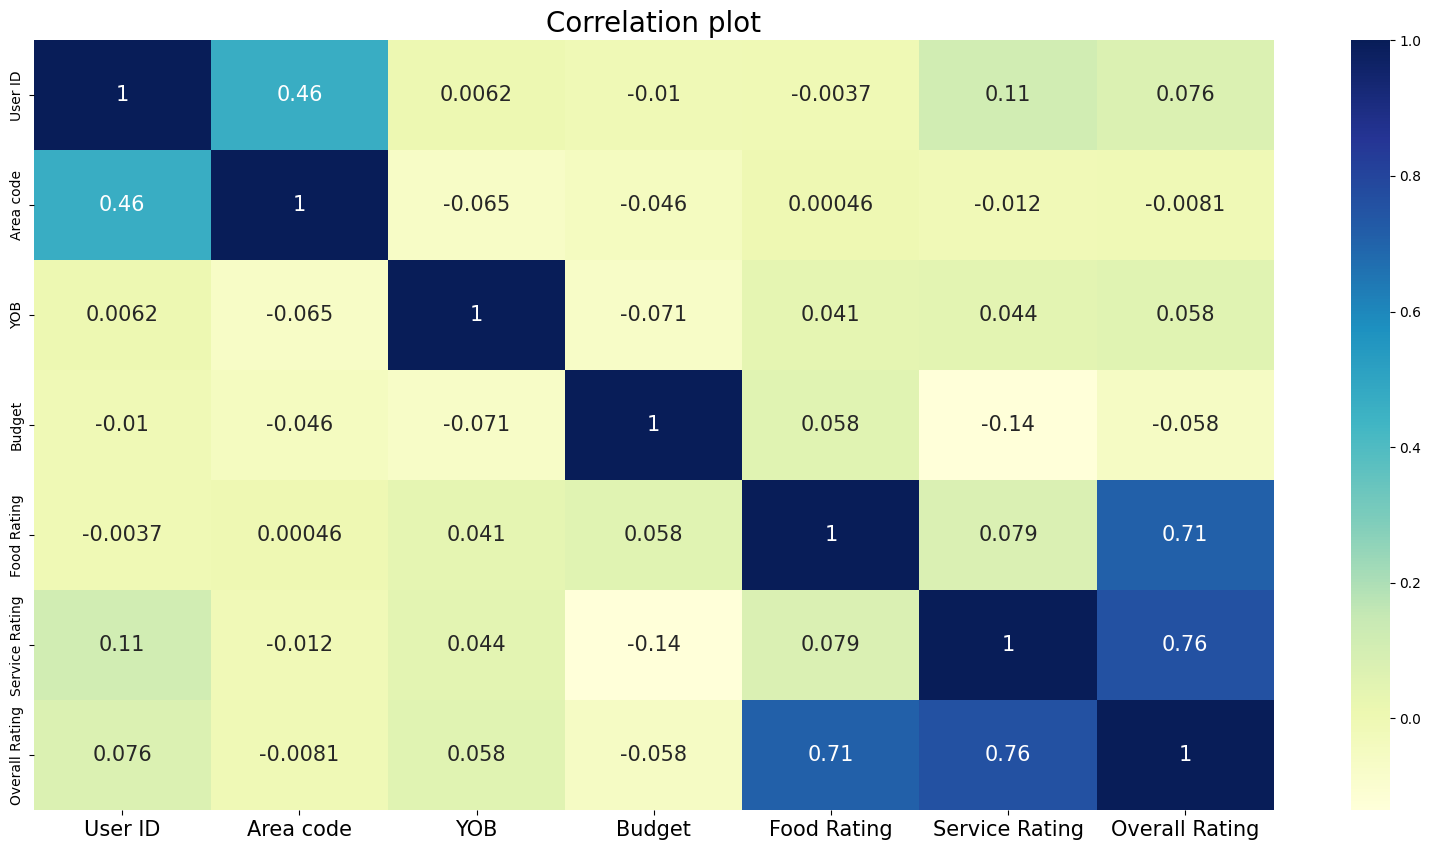

In [38]:
fig = plt.figure(figsize=(20,10))
df.corr()
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True,  annot_kws={'size': 15})
plt.xticks(fontsize=15)
plt.yticks(fontsize=10)
plt.title("Correlation plot",fontsize = 20)

### Conclusion: The above figure shows that there is a slight correltaion between foor rating, service rating and overall rating